<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [178]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [179]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [180]:
data = pd.read_csv('./train.csv')

In [284]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [285]:
data = data.replace(' ', np.nan)

print('Количество NaN в строках:')
print(data.isna().sum(axis=0))

Количество NaN в строках:
ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

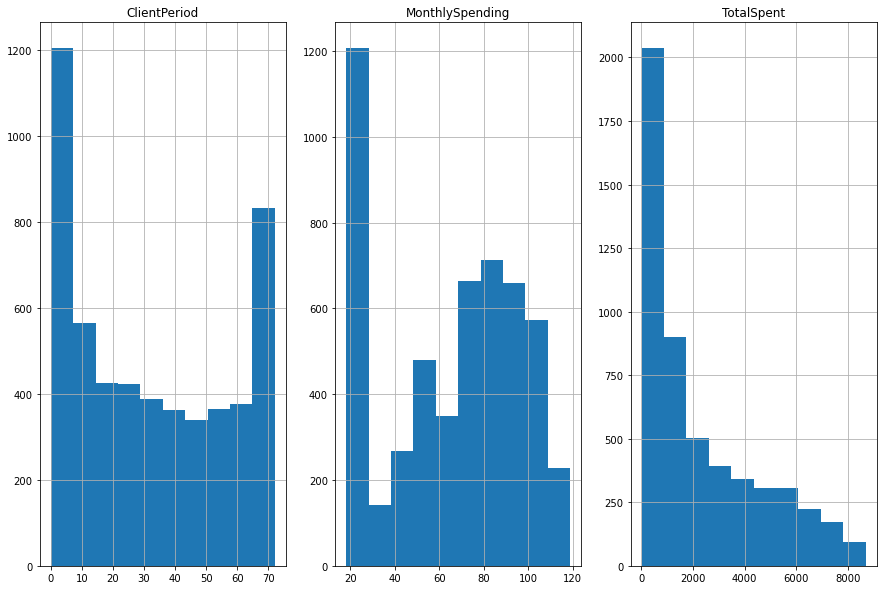

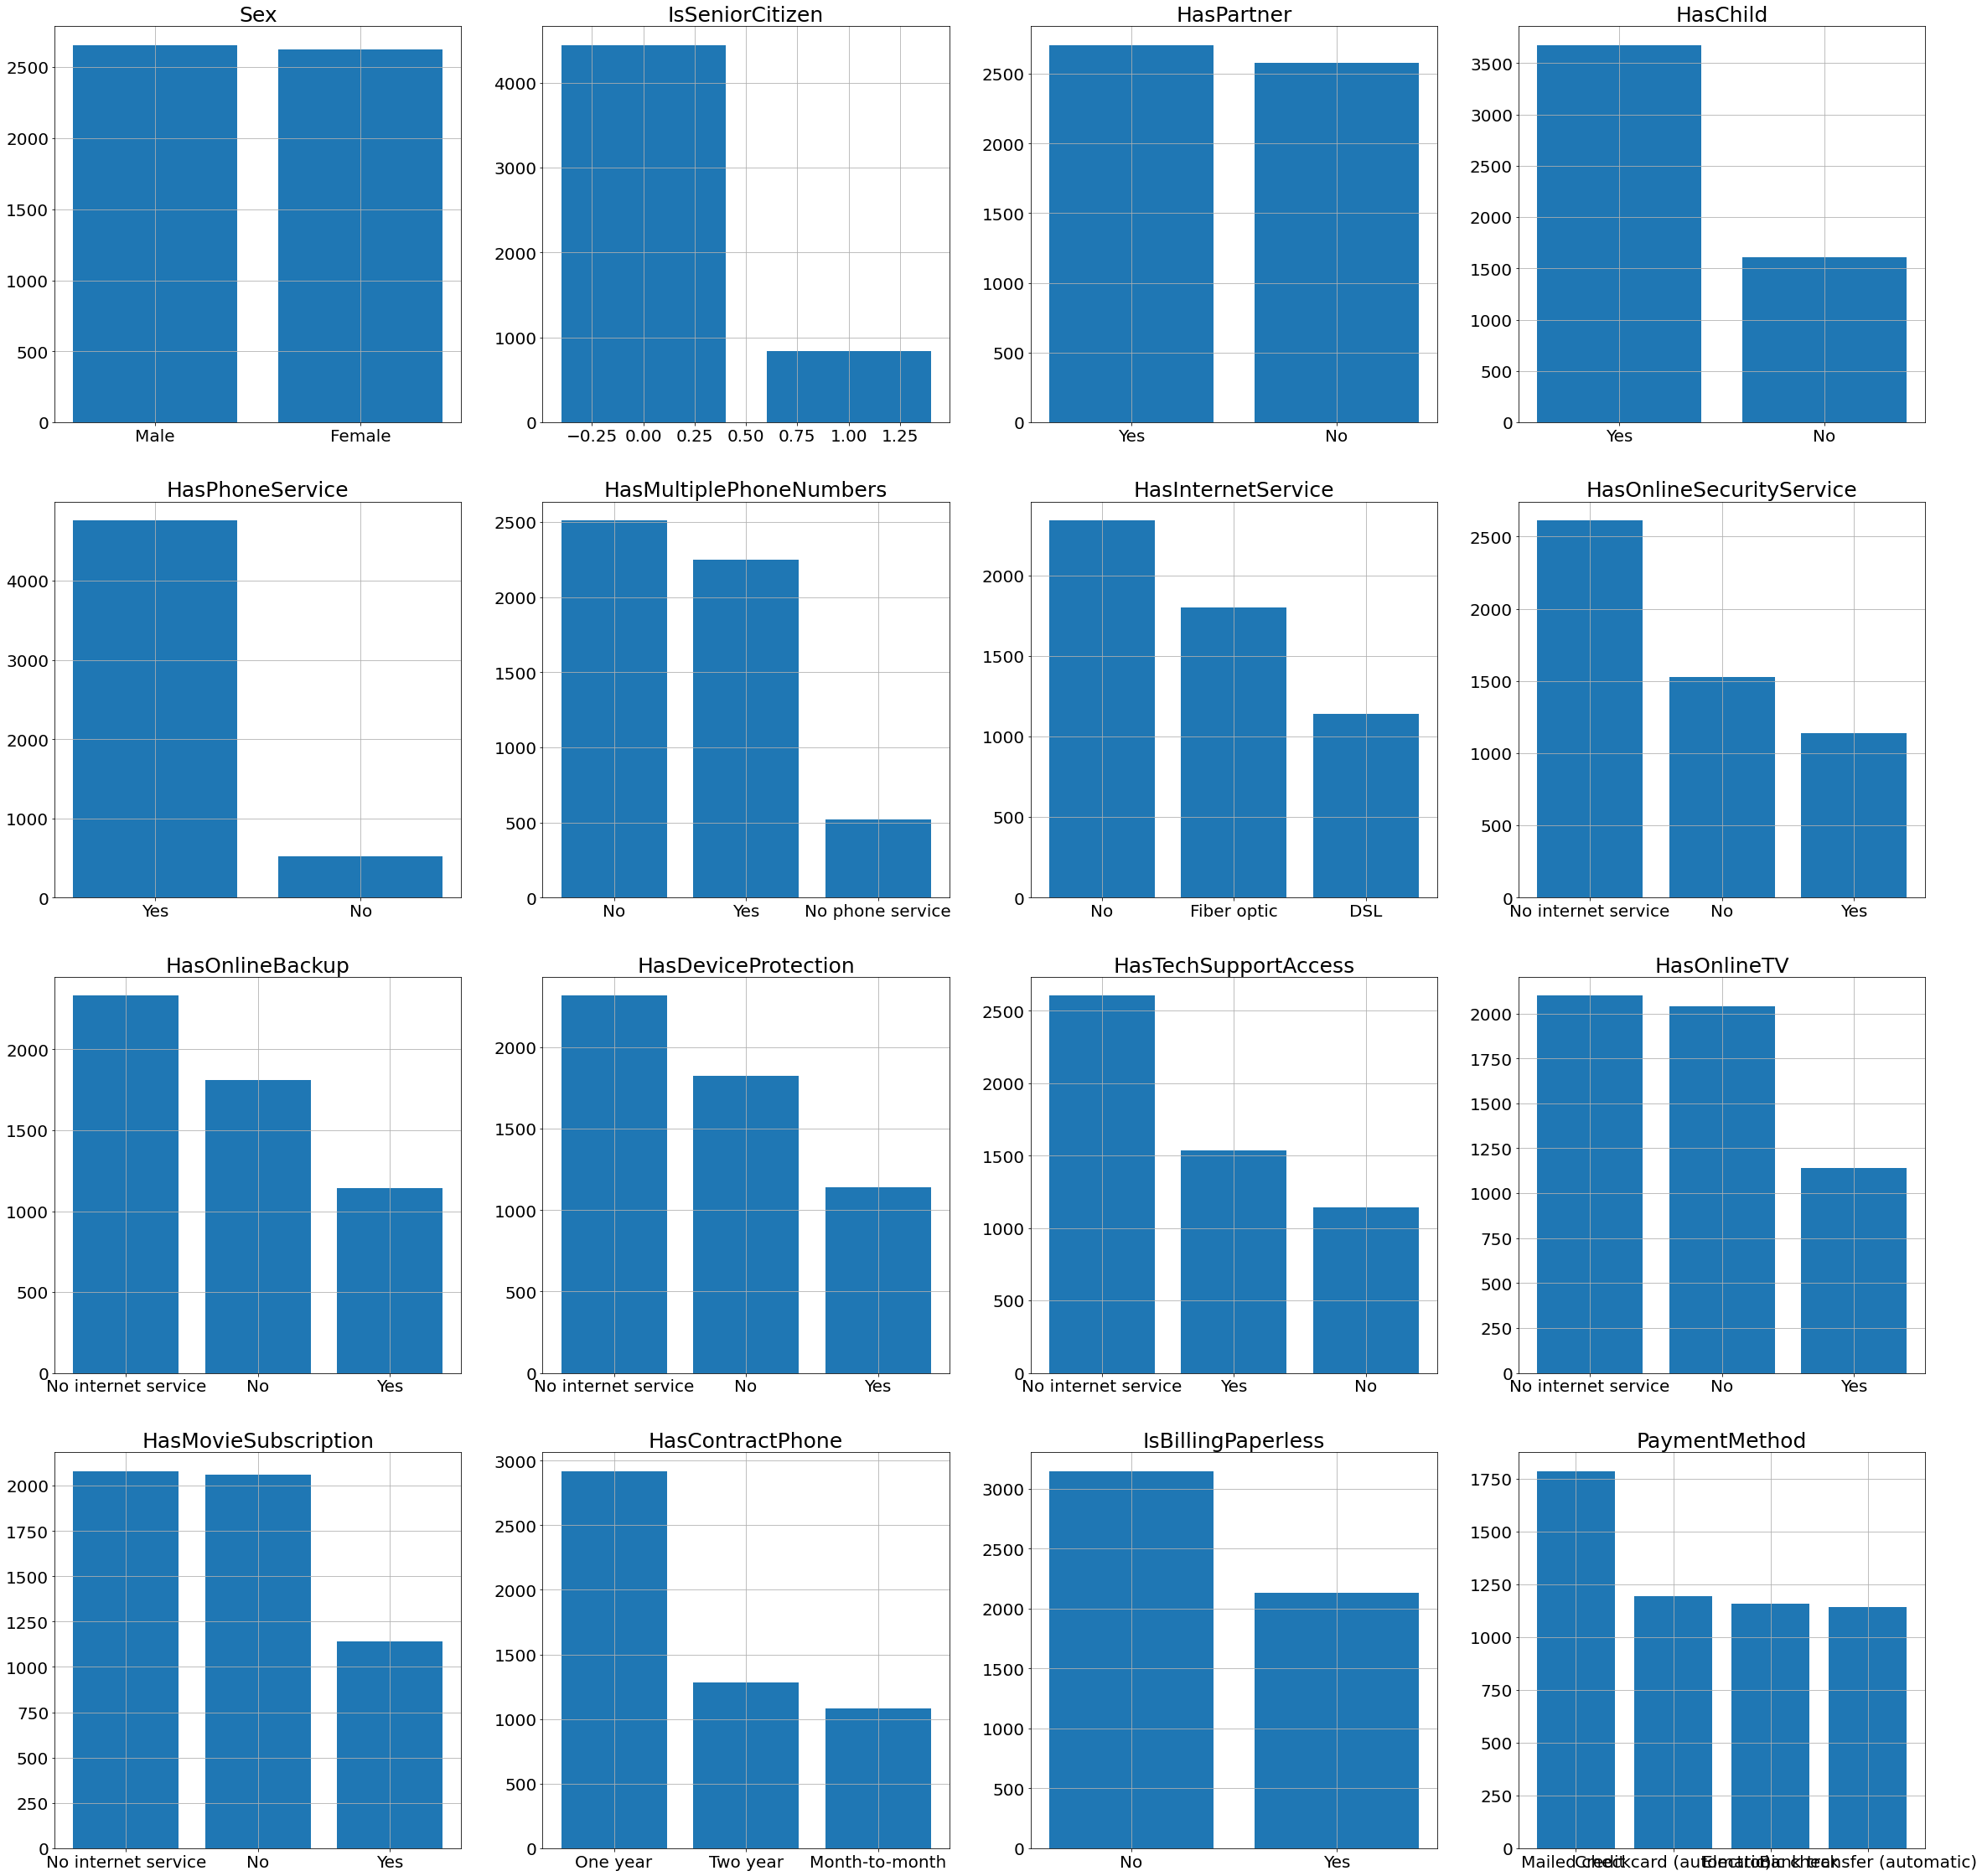

In [183]:
data['TotalSpent'] = data['TotalSpent'].astype(np.float64)

plt.figure(figsize=(15,10))
for count, value in enumerate(num_cols):
    ax = plt.subplot(1, 3, count+1)
    plt.hist(data[value])
    plt.title(value)
    plt.grid()

plt.figure(figsize=(40, 40))
for count, values in enumerate(cat_cols):
    plt.subplot(4, 4, count+1)
    plt.bar(list(data[values].unique()),list(data[values].value_counts()))
    plt.grid()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(values,fontsize=25)

# Несбалансированные классы

Большинство целевых переменных являются сбалансированными. Несбалансированные классы (отличие более, чем в 5 раз): IsSeniorCitizen, HasPhoneService, TotalSpent

<Figure size 432x288 with 0 Axes>

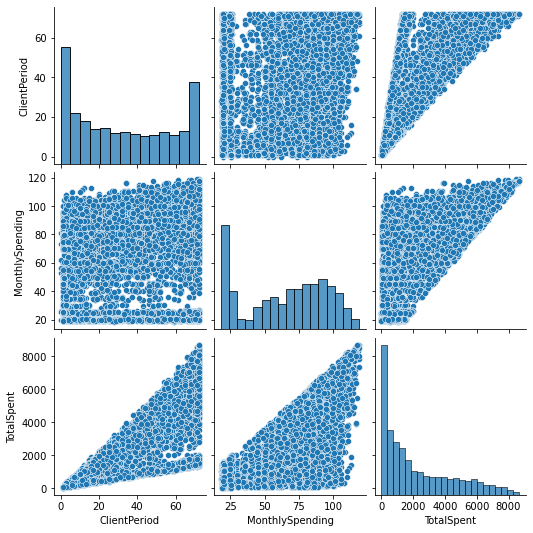

In [288]:
import seaborn as sns

plt.figure(1)
sns.pairplot(data[num_cols])
plt.show()

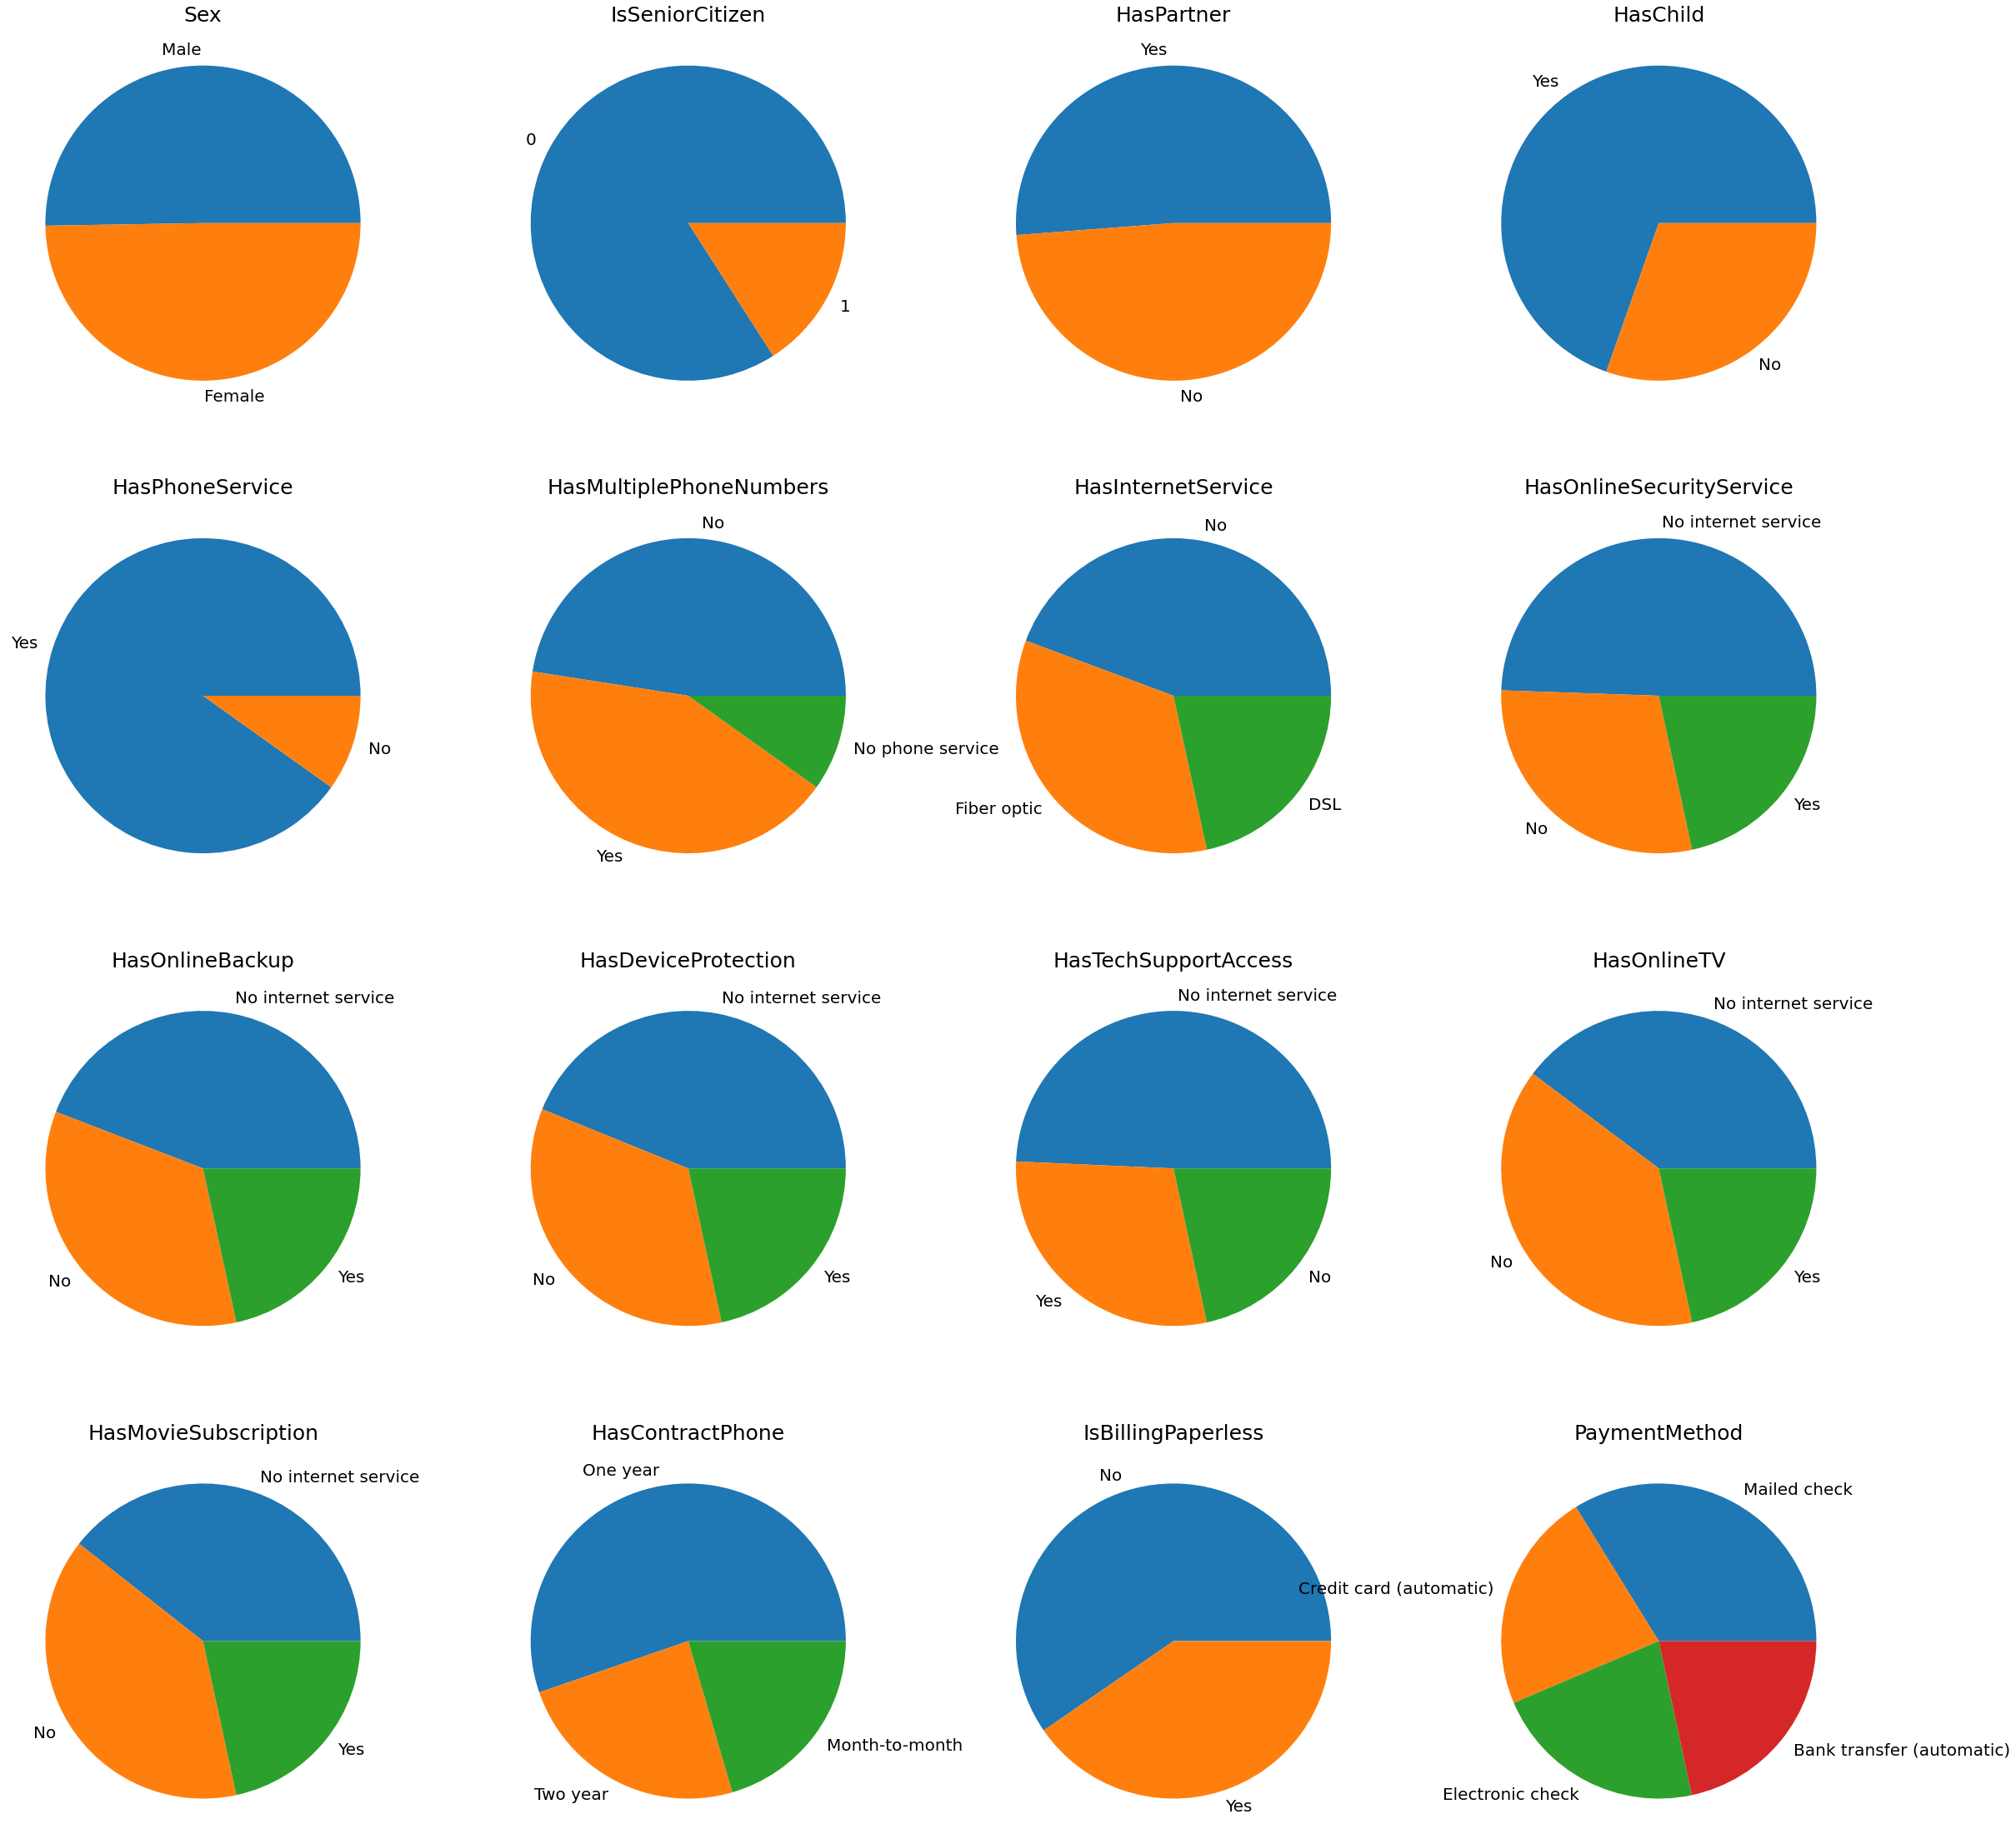

In [184]:
plt.figure(figsize=(40, 40))
for count, values in enumerate(cat_cols):
    ax = plt.subplot(4, 4, count+1)
    plt.pie(list(data[values].value_counts()), labels = list(data[values].unique()), textprops={'fontsize': 20})
    plt.grid()
    plt.title(values,fontsize=25)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [224]:
X = pd.concat([data[feature_cols], data[target_col]], axis=1)
X = X.dropna()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [225]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.1260s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 out of  55 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=8)]: Done  40 out of  55 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=8)]: Done  46 out of  55 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  52 out of  55 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  55 out of  55 | elapsed:    0.8s finished


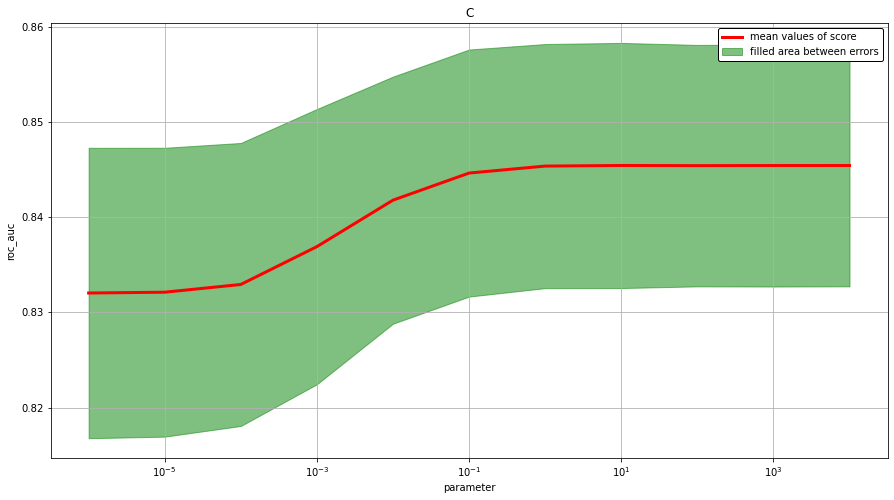

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :-1], X.iloc[:, -1], train_size=0.8)

cls = make_pipeline(
    ColumnTransformer(
        [('onehot', OneHotEncoder(), cat_cols),
         ('Scaler', StandardScaler(), num_cols)],
    ),
    LogisticRegression(),
)

grid = np.logspace(4, -6, num=11, base=10)

CV_model = GridSearchCV(
    estimator=cls, 
    param_grid={"logisticregression__C": grid},
    scoring = 'roc_auc',
    n_jobs = 8,
    verbose = 10,
    cv = 5
)
CV_model.fit(X_train, y_train)

mean_score = CV_model.cv_results_['mean_test_score']
std_score = CV_model.cv_results_['std_test_score']

plt.figure(figsize=(15, 8))
plt.title("C")
plt.xscale('log')
plt.plot(grid, mean_score, label='mean values of score', color='red', lw=3)
plt.fill_between(grid, mean_score - 2 * std_score, mean_score + 2 * std_score,
                 color='green', label='filled area between errors', alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('parameter')
plt.ylabel('roc_auc')
plt.grid(True)
plt.show()

In [232]:
CV_model.best_score_, CV_model.best_params_

(0.8454170386921958, {'logisticregression__C': 10.0})

In [233]:
roc_auc_score(y_test, CV_model.predict_proba(X_test)[:, 1])

0.8409485012798987

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

$\textbf{Наилучшее качество модели}$: 0.845 на тренировочной выборке, 0.841 на тестовой \\

$\textbf{Параметры для лучшей модели}$: С = 10

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [242]:
import catboost
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :-1], X.iloc[:, -1], train_size=0.8)

boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)

boosting_model.fit(X_train, y_train)

Learning rate set to 0.019048
0:	learn: 0.6807430	total: 8.99ms	remaining: 8.98s
1:	learn: 0.6720357	total: 13.1ms	remaining: 6.55s
2:	learn: 0.6609238	total: 23.2ms	remaining: 7.71s
3:	learn: 0.6523086	total: 28.8ms	remaining: 7.17s
4:	learn: 0.6431473	total: 33.8ms	remaining: 6.73s
5:	learn: 0.6342078	total: 39.5ms	remaining: 6.54s
6:	learn: 0.6259248	total: 46.3ms	remaining: 6.57s
7:	learn: 0.6172849	total: 51.6ms	remaining: 6.4s
8:	learn: 0.6102612	total: 55.2ms	remaining: 6.08s
9:	learn: 0.6015855	total: 60.3ms	remaining: 5.97s
10:	learn: 0.5937429	total: 64.7ms	remaining: 5.81s
11:	learn: 0.5866372	total: 69.1ms	remaining: 5.69s
12:	learn: 0.5795079	total: 73.7ms	remaining: 5.59s
13:	learn: 0.5728208	total: 77.7ms	remaining: 5.47s
14:	learn: 0.5661463	total: 82.5ms	remaining: 5.42s
15:	learn: 0.5596628	total: 87.5ms	remaining: 5.38s
16:	learn: 0.5541289	total: 91.9ms	remaining: 5.31s
17:	learn: 0.5479825	total: 97ms	remaining: 5.29s
18:	learn: 0.5421180	total: 102ms	remaining: 5.

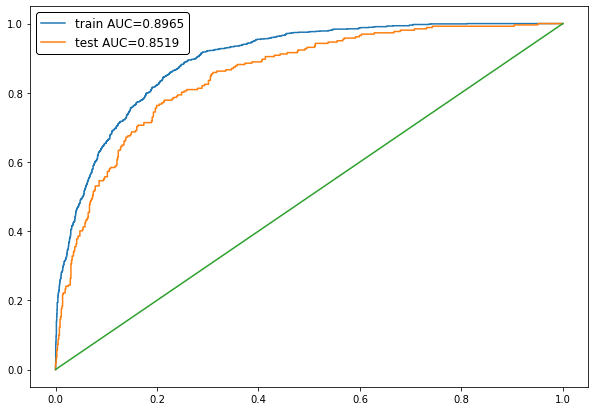

In [243]:
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [317]:
depth = np.arange(1, 5)
lr = np.logspace(0, -3, num=4, base=10)

function = np.array([])
for i_num, i in enumerate(depth):
    for j_num, j in enumerate(lr):
        catboost_model = catboost.CatBoostClassifier(
            cat_features=cat_cols,
            depth=i,
            learning_rate=j,
            n_estimators=200,
        )
        catboost_model.fit(X_train, y_train)
        pred_test = catboost_model.predict_proba(X_test)[:, 1]
        pred_train = catboost_model.predict_proba(X_train)[:, 1]
        train_auc = roc_auc_score(y_train, pred_train)
        test_auc = roc_auc_score(y_test, pred_test)
        function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)

0:	learn: 0.5195376	total: 2.62ms	remaining: 521ms
1:	learn: 0.4812169	total: 5.07ms	remaining: 501ms
2:	learn: 0.4470182	total: 7.25ms	remaining: 476ms
3:	learn: 0.4355958	total: 9.37ms	remaining: 459ms
4:	learn: 0.4328433	total: 11.4ms	remaining: 444ms
5:	learn: 0.4286935	total: 13.4ms	remaining: 434ms
6:	learn: 0.4266486	total: 15.3ms	remaining: 422ms
7:	learn: 0.4240409	total: 17.7ms	remaining: 425ms
8:	learn: 0.4218988	total: 20.5ms	remaining: 435ms
9:	learn: 0.4189942	total: 23.2ms	remaining: 441ms
10:	learn: 0.4163344	total: 25.8ms	remaining: 443ms
11:	learn: 0.4134192	total: 28ms	remaining: 439ms
12:	learn: 0.4124759	total: 30.3ms	remaining: 435ms
13:	learn: 0.4123913	total: 33.5ms	remaining: 445ms
14:	learn: 0.4114273	total: 36.1ms	remaining: 445ms
15:	learn: 0.4105731	total: 38.6ms	remaining: 444ms
16:	learn: 0.4088867	total: 41.3ms	remaining: 445ms
17:	learn: 0.4078115	total: 44.3ms	remaining: 448ms
18:	learn: 0.4072897	total: 46.4ms	remaining: 442ms
19:	learn: 0.4063289	tot

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


0:	learn: 0.6566687	total: 1.86ms	remaining: 371ms
1:	learn: 0.6279059	total: 3.58ms	remaining: 354ms
2:	learn: 0.6043397	total: 5.14ms	remaining: 338ms
3:	learn: 0.5860184	total: 6.81ms	remaining: 334ms
4:	learn: 0.5716069	total: 8.65ms	remaining: 337ms
5:	learn: 0.5604612	total: 10.2ms	remaining: 329ms
6:	learn: 0.5499835	total: 11.7ms	remaining: 323ms
7:	learn: 0.5401999	total: 13.4ms	remaining: 321ms
8:	learn: 0.5321275	total: 14.8ms	remaining: 315ms
9:	learn: 0.5188720	total: 16.7ms	remaining: 317ms
10:	learn: 0.5085227	total: 18.4ms	remaining: 316ms
11:	learn: 0.5004245	total: 20ms	remaining: 313ms
12:	learn: 0.4940477	total: 21.7ms	remaining: 312ms
13:	learn: 0.4890655	total: 23.2ms	remaining: 308ms
14:	learn: 0.4795539	total: 24.9ms	remaining: 307ms
15:	learn: 0.4716191	total: 26.5ms	remaining: 305ms
16:	learn: 0.4655795	total: 28.2ms	remaining: 304ms
17:	learn: 0.4611672	total: 29.9ms	remaining: 303ms
18:	learn: 0.4574316	total: 31.8ms	remaining: 303ms
19:	learn: 0.4543346	tot

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


11:	learn: 0.6532883	total: 18.6ms	remaining: 292ms
12:	learn: 0.6502699	total: 20.7ms	remaining: 297ms
13:	learn: 0.6473783	total: 22.4ms	remaining: 297ms
14:	learn: 0.6444863	total: 23.9ms	remaining: 295ms
15:	learn: 0.6416632	total: 25.5ms	remaining: 293ms
16:	learn: 0.6392566	total: 27.1ms	remaining: 291ms
17:	learn: 0.6365674	total: 28.7ms	remaining: 290ms
18:	learn: 0.6343492	total: 30.2ms	remaining: 288ms
19:	learn: 0.6319432	total: 31.8ms	remaining: 286ms
20:	learn: 0.6293540	total: 33.5ms	remaining: 286ms
21:	learn: 0.6269116	total: 35.1ms	remaining: 284ms
22:	learn: 0.6244765	total: 36.6ms	remaining: 282ms
23:	learn: 0.6220720	total: 38.2ms	remaining: 280ms
24:	learn: 0.6200051	total: 39.9ms	remaining: 279ms
25:	learn: 0.6176781	total: 41.5ms	remaining: 278ms
26:	learn: 0.6154394	total: 43ms	remaining: 275ms
27:	learn: 0.6131991	total: 44.5ms	remaining: 274ms
28:	learn: 0.6110379	total: 46.2ms	remaining: 273ms
29:	learn: 0.6088936	total: 47.7ms	remaining: 271ms
30:	learn: 0.6

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


19:	learn: 0.6857225	total: 31.4ms	remaining: 283ms
20:	learn: 0.6853526	total: 33.1ms	remaining: 282ms
21:	learn: 0.6849811	total: 35.2ms	remaining: 284ms
22:	learn: 0.6846969	total: 36.8ms	remaining: 284ms
23:	learn: 0.6843295	total: 38.3ms	remaining: 281ms
24:	learn: 0.6840403	total: 39.9ms	remaining: 280ms
25:	learn: 0.6836710	total: 41.4ms	remaining: 277ms
26:	learn: 0.6833057	total: 43ms	remaining: 275ms
27:	learn: 0.6829544	total: 44.5ms	remaining: 274ms
28:	learn: 0.6825948	total: 46.1ms	remaining: 272ms
29:	learn: 0.6822284	total: 47.7ms	remaining: 270ms
30:	learn: 0.6818682	total: 49.2ms	remaining: 268ms
31:	learn: 0.6815096	total: 50.8ms	remaining: 267ms
32:	learn: 0.6811688	total: 52.3ms	remaining: 265ms
33:	learn: 0.6808070	total: 54.4ms	remaining: 266ms
34:	learn: 0.6804510	total: 56ms	remaining: 264ms
35:	learn: 0.6800898	total: 57.6ms	remaining: 262ms
36:	learn: 0.6797311	total: 59.2ms	remaining: 261ms
37:	learn: 0.6793726	total: 60.8ms	remaining: 259ms
38:	learn: 0.679

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


24:	learn: 0.3970776	total: 52.8ms	remaining: 370ms
25:	learn: 0.3958513	total: 55.6ms	remaining: 372ms
26:	learn: 0.3953402	total: 57.7ms	remaining: 370ms
27:	learn: 0.3947934	total: 59.6ms	remaining: 366ms
28:	learn: 0.3938158	total: 62.1ms	remaining: 366ms
29:	learn: 0.3937705	total: 64.1ms	remaining: 363ms
30:	learn: 0.3937705	total: 66.2ms	remaining: 361ms
31:	learn: 0.3920002	total: 68.7ms	remaining: 361ms
32:	learn: 0.3908535	total: 70.7ms	remaining: 358ms
33:	learn: 0.3902310	total: 73.1ms	remaining: 357ms
34:	learn: 0.3901415	total: 75.4ms	remaining: 356ms
35:	learn: 0.3890327	total: 77.8ms	remaining: 355ms
36:	learn: 0.3877470	total: 80.1ms	remaining: 353ms
37:	learn: 0.3871732	total: 82.3ms	remaining: 351ms
38:	learn: 0.3864311	total: 84.9ms	remaining: 350ms
39:	learn: 0.3863087	total: 88.2ms	remaining: 353ms
40:	learn: 0.3859589	total: 90.5ms	remaining: 351ms
41:	learn: 0.3858235	total: 92.8ms	remaining: 349ms
42:	learn: 0.3857272	total: 95.4ms	remaining: 348ms
43:	learn: 0

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


59:	learn: 0.4036568	total: 125ms	remaining: 292ms
60:	learn: 0.4035991	total: 127ms	remaining: 290ms
61:	learn: 0.4033474	total: 130ms	remaining: 289ms
62:	learn: 0.4033388	total: 132ms	remaining: 287ms
63:	learn: 0.4031341	total: 134ms	remaining: 285ms
64:	learn: 0.4029536	total: 136ms	remaining: 283ms
65:	learn: 0.4028755	total: 138ms	remaining: 280ms
66:	learn: 0.4027282	total: 141ms	remaining: 280ms
67:	learn: 0.4026199	total: 144ms	remaining: 279ms
68:	learn: 0.4025996	total: 146ms	remaining: 278ms
69:	learn: 0.4023097	total: 149ms	remaining: 277ms
70:	learn: 0.4020100	total: 151ms	remaining: 275ms
71:	learn: 0.4018175	total: 153ms	remaining: 272ms
72:	learn: 0.4017723	total: 155ms	remaining: 270ms
73:	learn: 0.4016242	total: 157ms	remaining: 268ms
74:	learn: 0.4016058	total: 159ms	remaining: 265ms
75:	learn: 0.4012024	total: 161ms	remaining: 263ms
76:	learn: 0.4011888	total: 163ms	remaining: 261ms
77:	learn: 0.4010069	total: 165ms	remaining: 259ms
78:	learn: 0.4009538	total: 168

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


15:	learn: 0.6282112	total: 33.5ms	remaining: 385ms
16:	learn: 0.6248154	total: 36.4ms	remaining: 392ms
17:	learn: 0.6220297	total: 38.8ms	remaining: 392ms
18:	learn: 0.6188980	total: 41ms	remaining: 390ms
19:	learn: 0.6152153	total: 43.3ms	remaining: 390ms
20:	learn: 0.6119798	total: 45.7ms	remaining: 389ms
21:	learn: 0.6088722	total: 47.9ms	remaining: 388ms
22:	learn: 0.6057094	total: 49.8ms	remaining: 383ms
23:	learn: 0.6027328	total: 52ms	remaining: 382ms
24:	learn: 0.5998748	total: 54.4ms	remaining: 381ms
25:	learn: 0.5969664	total: 56.6ms	remaining: 379ms
26:	learn: 0.5936083	total: 59ms	remaining: 378ms
27:	learn: 0.5901631	total: 61.4ms	remaining: 377ms
28:	learn: 0.5866421	total: 64.1ms	remaining: 378ms
29:	learn: 0.5832314	total: 66.1ms	remaining: 375ms
30:	learn: 0.5801854	total: 67.9ms	remaining: 370ms
31:	learn: 0.5768257	total: 69.6ms	remaining: 366ms
32:	learn: 0.5739471	total: 71.6ms	remaining: 362ms
33:	learn: 0.5707605	total: 73.5ms	remaining: 359ms
34:	learn: 0.56793

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


61:	learn: 0.6655960	total: 127ms	remaining: 283ms
62:	learn: 0.6651619	total: 129ms	remaining: 282ms
63:	learn: 0.6647939	total: 132ms	remaining: 280ms
64:	learn: 0.6643579	total: 134ms	remaining: 279ms
65:	learn: 0.6639304	total: 136ms	remaining: 277ms
66:	learn: 0.6635094	total: 139ms	remaining: 276ms
67:	learn: 0.6630531	total: 142ms	remaining: 275ms
68:	learn: 0.6626216	total: 144ms	remaining: 273ms
69:	learn: 0.6622225	total: 147ms	remaining: 272ms
70:	learn: 0.6618898	total: 149ms	remaining: 271ms
71:	learn: 0.6614922	total: 151ms	remaining: 269ms
72:	learn: 0.6610783	total: 153ms	remaining: 267ms
73:	learn: 0.6606552	total: 155ms	remaining: 265ms
74:	learn: 0.6601934	total: 158ms	remaining: 263ms
75:	learn: 0.6597880	total: 160ms	remaining: 261ms
76:	learn: 0.6593715	total: 162ms	remaining: 259ms
77:	learn: 0.6589584	total: 164ms	remaining: 256ms
78:	learn: 0.6585341	total: 166ms	remaining: 254ms
79:	learn: 0.6581373	total: 168ms	remaining: 252ms
80:	learn: 0.6577734	total: 170

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


14:	learn: 0.3927646	total: 44ms	remaining: 543ms
15:	learn: 0.3919058	total: 47.8ms	remaining: 550ms
16:	learn: 0.3890208	total: 50.7ms	remaining: 546ms
17:	learn: 0.3879489	total: 53.8ms	remaining: 544ms
18:	learn: 0.3856097	total: 56.9ms	remaining: 542ms
19:	learn: 0.3855563	total: 59.7ms	remaining: 537ms
20:	learn: 0.3832425	total: 63.7ms	remaining: 543ms
21:	learn: 0.3827401	total: 66.7ms	remaining: 539ms
22:	learn: 0.3826078	total: 70.1ms	remaining: 539ms
23:	learn: 0.3814629	total: 73.9ms	remaining: 542ms
24:	learn: 0.3801364	total: 77.5ms	remaining: 542ms
25:	learn: 0.3795561	total: 80.3ms	remaining: 538ms
26:	learn: 0.3785578	total: 83ms	remaining: 532ms
27:	learn: 0.3783602	total: 86.2ms	remaining: 529ms
28:	learn: 0.3773802	total: 88.9ms	remaining: 524ms
29:	learn: 0.3753299	total: 91.9ms	remaining: 521ms
30:	learn: 0.3743635	total: 95.6ms	remaining: 521ms
31:	learn: 0.3730767	total: 98.1ms	remaining: 515ms
32:	learn: 0.3730508	total: 101ms	remaining: 513ms
33:	learn: 0.3726

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


0:	learn: 0.6377404	total: 2.96ms	remaining: 589ms
1:	learn: 0.6002632	total: 5.94ms	remaining: 588ms
2:	learn: 0.5711247	total: 9.35ms	remaining: 614ms
3:	learn: 0.5404011	total: 12ms	remaining: 589ms
4:	learn: 0.5136721	total: 15.1ms	remaining: 587ms
5:	learn: 0.4927136	total: 17.8ms	remaining: 574ms
6:	learn: 0.4770404	total: 20.2ms	remaining: 556ms
7:	learn: 0.4650990	total: 23.2ms	remaining: 558ms
8:	learn: 0.4556909	total: 26.1ms	remaining: 553ms
9:	learn: 0.4487635	total: 29.1ms	remaining: 552ms
10:	learn: 0.4443713	total: 31.6ms	remaining: 543ms
11:	learn: 0.4396023	total: 34.1ms	remaining: 534ms
12:	learn: 0.4355002	total: 36.9ms	remaining: 530ms
13:	learn: 0.4318620	total: 39.9ms	remaining: 530ms
14:	learn: 0.4294255	total: 42.4ms	remaining: 523ms
15:	learn: 0.4269047	total: 45ms	remaining: 517ms
16:	learn: 0.4254819	total: 46.8ms	remaining: 504ms
17:	learn: 0.4231003	total: 49.1ms	remaining: 497ms
18:	learn: 0.4215271	total: 51.7ms	remaining: 492ms
19:	learn: 0.4198319	total

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


0:	learn: 0.6871698	total: 3.45ms	remaining: 687ms
1:	learn: 0.6820594	total: 6.55ms	remaining: 649ms
2:	learn: 0.6768511	total: 9.63ms	remaining: 632ms
3:	learn: 0.6716864	total: 12.5ms	remaining: 611ms
4:	learn: 0.6664358	total: 15.2ms	remaining: 595ms
5:	learn: 0.6611458	total: 18.4ms	remaining: 596ms
6:	learn: 0.6563064	total: 21.4ms	remaining: 591ms
7:	learn: 0.6512195	total: 24.4ms	remaining: 586ms
8:	learn: 0.6467895	total: 27.6ms	remaining: 586ms
9:	learn: 0.6422889	total: 30.6ms	remaining: 582ms
10:	learn: 0.6380548	total: 33.7ms	remaining: 579ms
11:	learn: 0.6336240	total: 36.8ms	remaining: 577ms
12:	learn: 0.6300437	total: 39.6ms	remaining: 569ms
13:	learn: 0.6260744	total: 42.2ms	remaining: 561ms
14:	learn: 0.6220149	total: 46.4ms	remaining: 572ms
15:	learn: 0.6179979	total: 49ms	remaining: 563ms
16:	learn: 0.6142637	total: 51.6ms	remaining: 555ms
17:	learn: 0.6105620	total: 54.2ms	remaining: 548ms
18:	learn: 0.6071977	total: 56.9ms	remaining: 542ms
19:	learn: 0.6035681	tot

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


0:	learn: 0.6925451	total: 3.55ms	remaining: 706ms
1:	learn: 0.6920188	total: 6.74ms	remaining: 667ms
2:	learn: 0.6914707	total: 10.5ms	remaining: 689ms
3:	learn: 0.6909171	total: 13.3ms	remaining: 651ms
4:	learn: 0.6903772	total: 16.1ms	remaining: 627ms
5:	learn: 0.6898098	total: 18.9ms	remaining: 610ms
6:	learn: 0.6892770	total: 21.9ms	remaining: 604ms
7:	learn: 0.6886917	total: 24.7ms	remaining: 592ms
8:	learn: 0.6881034	total: 27.2ms	remaining: 577ms
9:	learn: 0.6875434	total: 29.9ms	remaining: 568ms
10:	learn: 0.6870089	total: 32.6ms	remaining: 561ms
11:	learn: 0.6864880	total: 35.9ms	remaining: 562ms
12:	learn: 0.6859589	total: 38.6ms	remaining: 555ms
13:	learn: 0.6853831	total: 41.4ms	remaining: 550ms
14:	learn: 0.6848548	total: 43.9ms	remaining: 542ms
15:	learn: 0.6843166	total: 46.3ms	remaining: 533ms
16:	learn: 0.6837427	total: 49.1ms	remaining: 528ms
17:	learn: 0.6831848	total: 51.8ms	remaining: 524ms
18:	learn: 0.6826181	total: 55.3ms	remaining: 527ms
19:	learn: 0.6821072	t

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


0:	learn: 0.4519758	total: 4.14ms	remaining: 824ms
1:	learn: 0.4279926	total: 8.77ms	remaining: 868ms
2:	learn: 0.4147398	total: 13.1ms	remaining: 863ms
3:	learn: 0.4081230	total: 17.7ms	remaining: 868ms
4:	learn: 0.4044993	total: 20.8ms	remaining: 812ms
5:	learn: 0.4020343	total: 24.7ms	remaining: 798ms
6:	learn: 0.3987566	total: 28.1ms	remaining: 775ms
7:	learn: 0.3970149	total: 31.8ms	remaining: 763ms
8:	learn: 0.3966555	total: 34.4ms	remaining: 731ms
9:	learn: 0.3964951	total: 37.4ms	remaining: 710ms
10:	learn: 0.3931573	total: 41ms	remaining: 704ms
11:	learn: 0.3909718	total: 44.9ms	remaining: 703ms
12:	learn: 0.3874717	total: 48.8ms	remaining: 703ms
13:	learn: 0.3843059	total: 52.4ms	remaining: 696ms
14:	learn: 0.3821855	total: 55.7ms	remaining: 687ms
15:	learn: 0.3802919	total: 59.5ms	remaining: 685ms
16:	learn: 0.3748871	total: 63.8ms	remaining: 687ms
17:	learn: 0.3726636	total: 67.5ms	remaining: 682ms
18:	learn: 0.3705433	total: 71.3ms	remaining: 679ms
19:	learn: 0.3677556	tot

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


1:	learn: 0.5931417	total: 7.81ms	remaining: 773ms
2:	learn: 0.5589553	total: 11.4ms	remaining: 751ms
3:	learn: 0.5355770	total: 15ms	remaining: 735ms
4:	learn: 0.5092385	total: 18.5ms	remaining: 723ms
5:	learn: 0.4892129	total: 22.2ms	remaining: 717ms
6:	learn: 0.4727522	total: 25.3ms	remaining: 697ms
7:	learn: 0.4601031	total: 29.2ms	remaining: 701ms
8:	learn: 0.4507796	total: 32.3ms	remaining: 685ms
9:	learn: 0.4421163	total: 35.9ms	remaining: 683ms
10:	learn: 0.4353502	total: 39.2ms	remaining: 674ms
11:	learn: 0.4300050	total: 42.4ms	remaining: 664ms
12:	learn: 0.4263930	total: 45.6ms	remaining: 655ms
13:	learn: 0.4236526	total: 49.1ms	remaining: 652ms
14:	learn: 0.4207454	total: 53.1ms	remaining: 655ms
15:	learn: 0.4179934	total: 56.3ms	remaining: 647ms
16:	learn: 0.4162060	total: 59.2ms	remaining: 637ms
17:	learn: 0.4152420	total: 60.9ms	remaining: 616ms
18:	learn: 0.4144749	total: 63.2ms	remaining: 602ms
19:	learn: 0.4129906	total: 66.2ms	remaining: 596ms
20:	learn: 0.4115685	to

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


18:	learn: 0.6042999	total: 61.6ms	remaining: 587ms
19:	learn: 0.6009631	total: 64.4ms	remaining: 580ms
20:	learn: 0.5975009	total: 68ms	remaining: 579ms
21:	learn: 0.5940887	total: 71.3ms	remaining: 577ms
22:	learn: 0.5898857	total: 74.9ms	remaining: 577ms
23:	learn: 0.5859591	total: 78.7ms	remaining: 577ms
24:	learn: 0.5821821	total: 82.9ms	remaining: 580ms
25:	learn: 0.5784731	total: 86.3ms	remaining: 577ms
26:	learn: 0.5744851	total: 89.2ms	remaining: 572ms
27:	learn: 0.5705641	total: 92.7ms	remaining: 570ms
28:	learn: 0.5671042	total: 96.3ms	remaining: 568ms
29:	learn: 0.5637776	total: 100ms	remaining: 567ms
30:	learn: 0.5602439	total: 103ms	remaining: 564ms
31:	learn: 0.5567435	total: 106ms	remaining: 558ms
32:	learn: 0.5535999	total: 110ms	remaining: 556ms
33:	learn: 0.5501995	total: 113ms	remaining: 553ms
34:	learn: 0.5471211	total: 116ms	remaining: 549ms
35:	learn: 0.5440229	total: 120ms	remaining: 545ms
36:	learn: 0.5409579	total: 123ms	remaining: 540ms
37:	learn: 0.5384680	t

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


0:	learn: 0.6925206	total: 3.86ms	remaining: 767ms
1:	learn: 0.6919242	total: 7.98ms	remaining: 790ms
2:	learn: 0.6912706	total: 11.5ms	remaining: 758ms
3:	learn: 0.6906927	total: 15.2ms	remaining: 745ms
4:	learn: 0.6901206	total: 18.5ms	remaining: 721ms
5:	learn: 0.6895843	total: 22ms	remaining: 710ms
6:	learn: 0.6890363	total: 24.9ms	remaining: 688ms
7:	learn: 0.6884381	total: 28ms	remaining: 671ms
8:	learn: 0.6878464	total: 30.9ms	remaining: 656ms
9:	learn: 0.6873001	total: 34ms	remaining: 646ms
10:	learn: 0.6867291	total: 36.9ms	remaining: 633ms
11:	learn: 0.6861775	total: 39.8ms	remaining: 624ms
12:	learn: 0.6856526	total: 42.1ms	remaining: 606ms
13:	learn: 0.6850696	total: 45.1ms	remaining: 599ms
14:	learn: 0.6844864	total: 48.3ms	remaining: 595ms
15:	learn: 0.6838878	total: 51.4ms	remaining: 591ms
16:	learn: 0.6832878	total: 54.5ms	remaining: 586ms
17:	learn: 0.6828114	total: 57.2ms	remaining: 579ms
18:	learn: 0.6822302	total: 59.9ms	remaining: 571ms
19:	learn: 0.6817069	total: 

<ipython-input-317-358421332f36>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function = np.append(function, np.array([i, j, *roc_curve(y_train, pred_train)[:2], *roc_curve(y_test, pred_test)[:2], train_auc, test_auc]), axis=0)


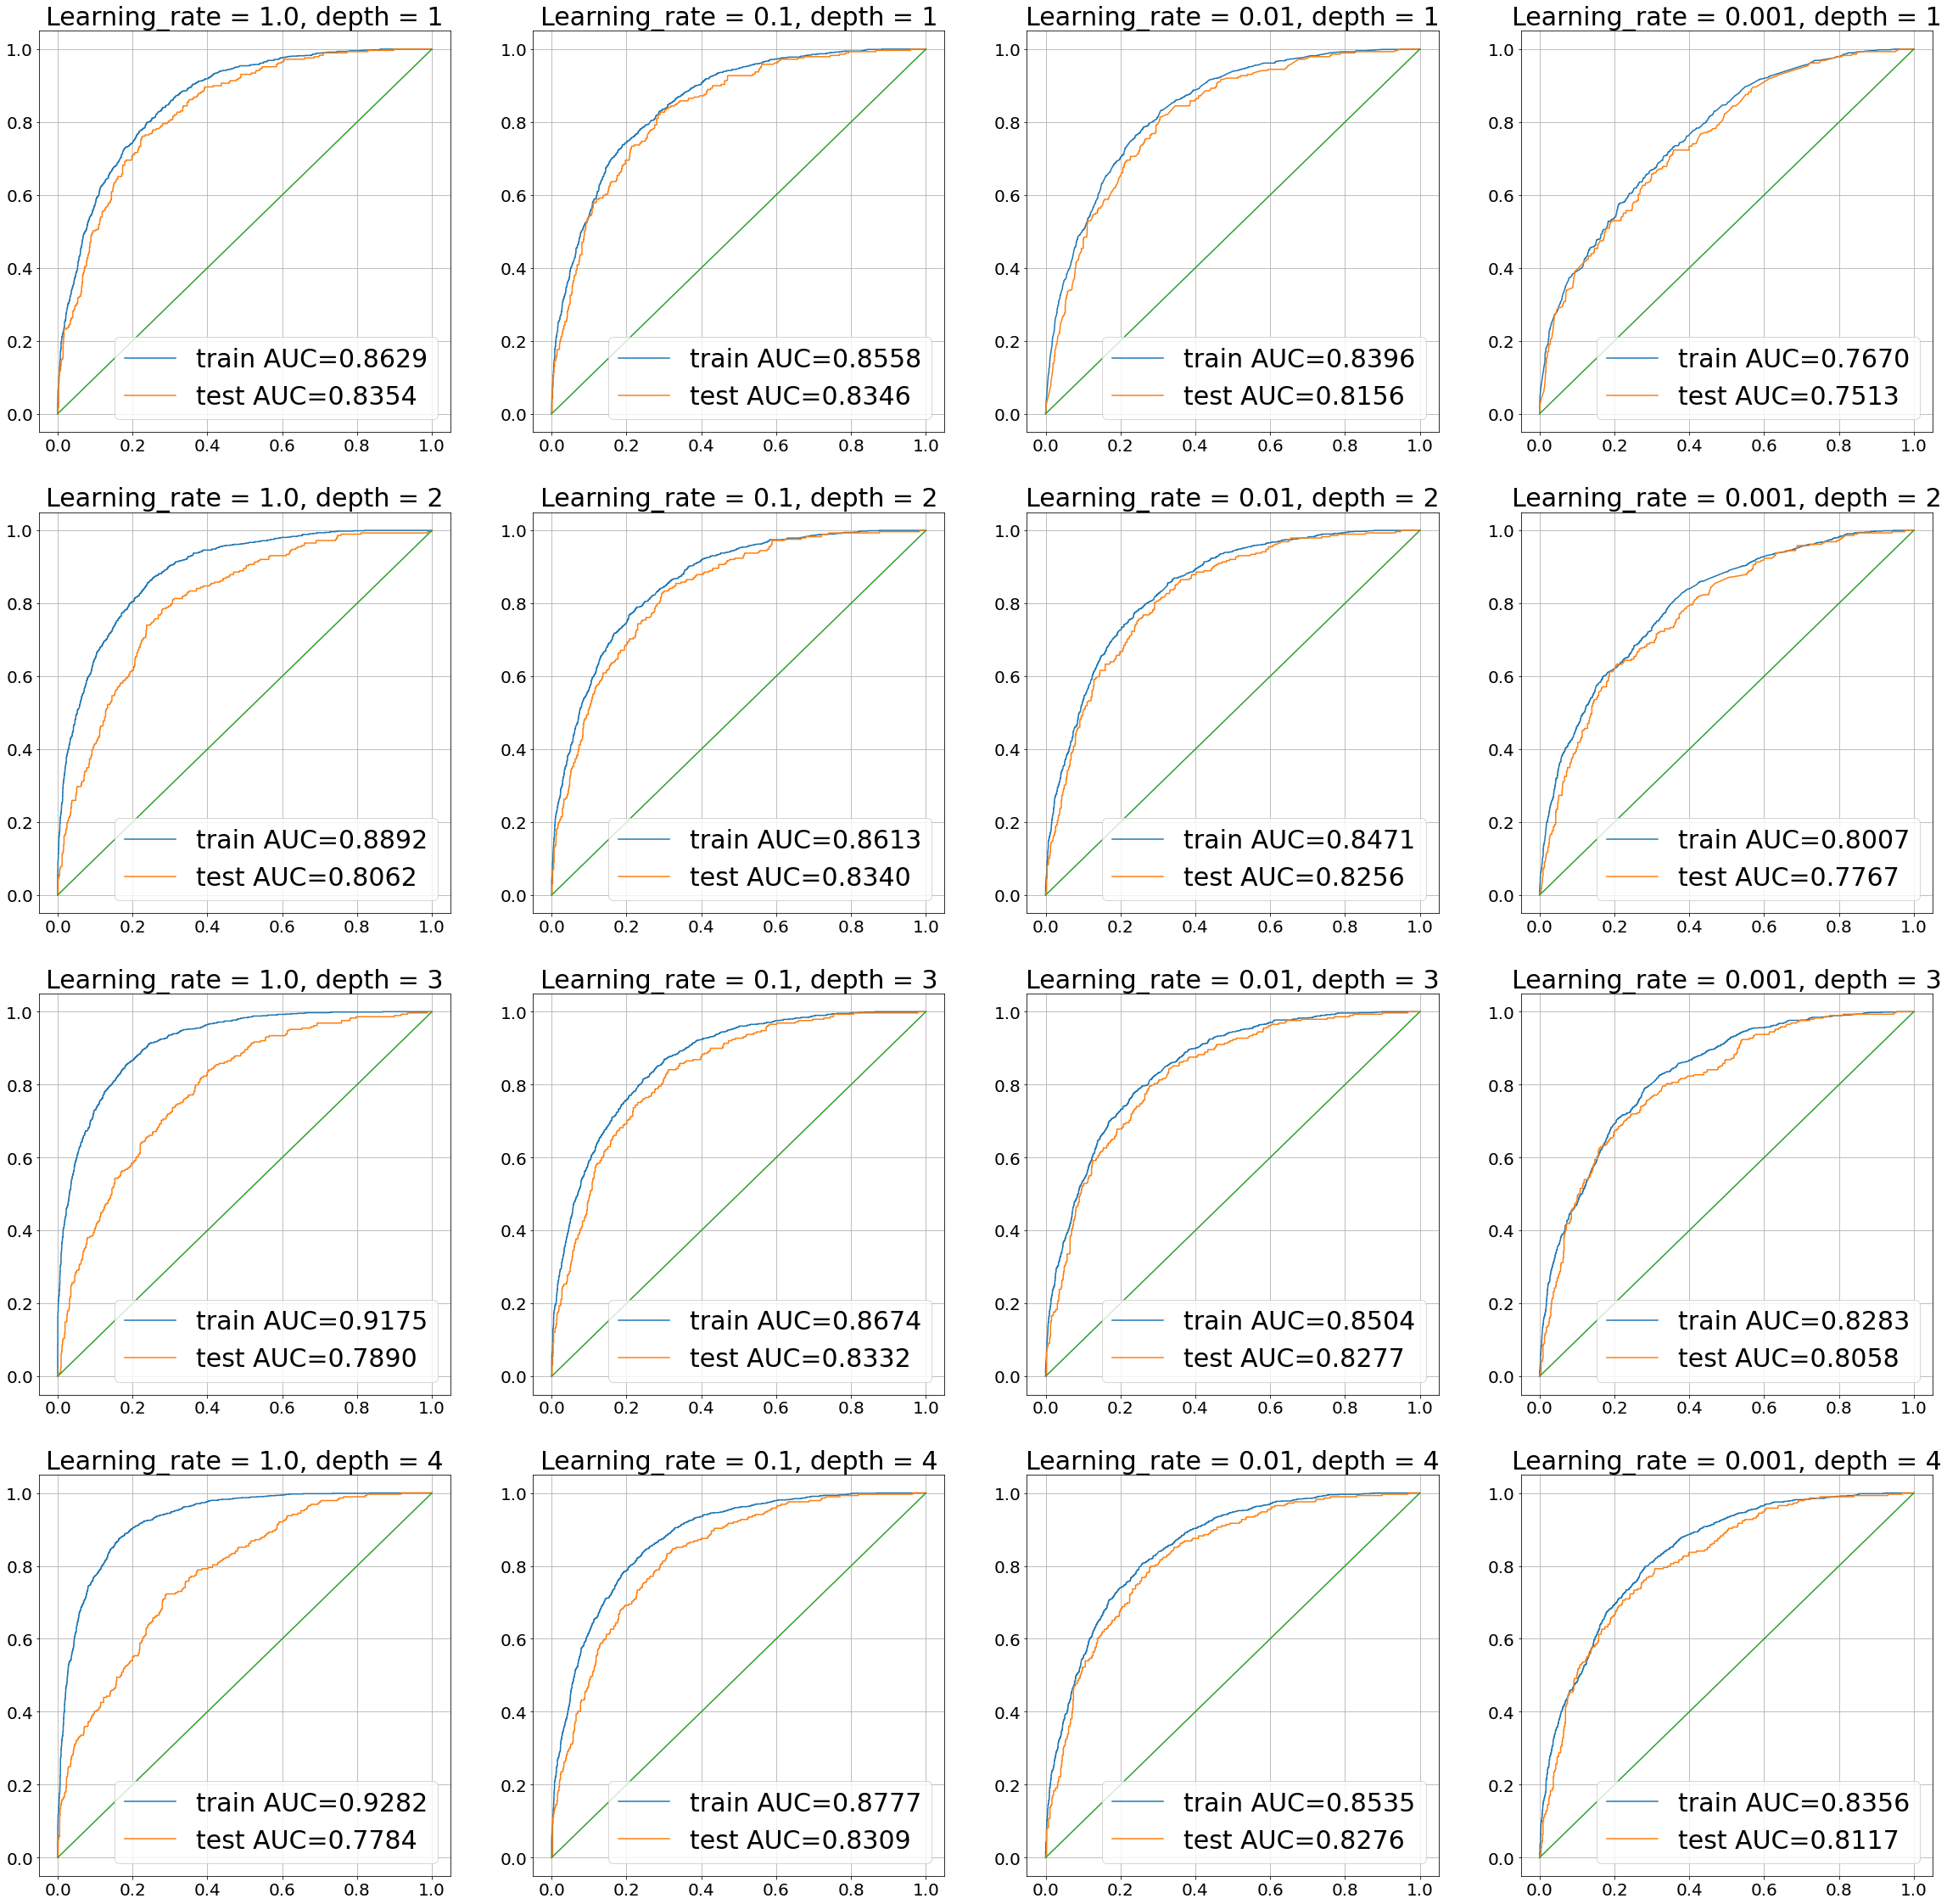

In [328]:
function = np.reshape(function,(16,8))

plt.figure(figsize=(40, 40))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.plot(function[i,2],function[i,3] , label='train AUC={:.4f}'.format(function[i,6]))
    plt.plot(function[i,4],function[i,5], label='test AUC={:.4f}'.format(function[i,7]))
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.grid()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=30)
    plt.title('Learning_rate = {}, depth = {}'.format(function[i,1], function[i,0]), fontsize=30)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

$\textbf{Лучшее качество по тренировочной выборке:}$ 0.9282 $(\textbf{параметры:}$ learning rate=1, depth=3)  

$\textbf{Лучшее качество по тестовой выборке:}$ 0.8332 $(\textbf{параметры:}$ learning rate=0.1, depth=3)  

$\textbf{Оптимальное качество по двум выборкам:}$ 0.8777, 0.8309 $(\textbf{параметры:}$ learning_rate=0.1, depth=4)

# Предсказания

In [278]:
best_model = catboost_model = catboost.CatBoostClassifier(
            cat_features=cat_cols,
            depth=4,
            learning_rate=0.1,
            n_estimators=200
        )
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :-1], X.iloc[:, -1], train_size=0.8)

best_model.fit(X_train, y_train)

best_model.fit(X.iloc[:, :-1], X.iloc[:, -1])

0:	learn: 0.6354824	total: 8.28ms	remaining: 1.65s
1:	learn: 0.5931417	total: 13.6ms	remaining: 1.35s
2:	learn: 0.5589553	total: 17.6ms	remaining: 1.15s
3:	learn: 0.5355770	total: 21.8ms	remaining: 1.07s
4:	learn: 0.5092385	total: 26.2ms	remaining: 1.02s
5:	learn: 0.4892129	total: 31.8ms	remaining: 1.03s
6:	learn: 0.4727522	total: 36.2ms	remaining: 998ms
7:	learn: 0.4601031	total: 40.9ms	remaining: 981ms
8:	learn: 0.4507796	total: 44.5ms	remaining: 945ms
9:	learn: 0.4421163	total: 47.8ms	remaining: 908ms
10:	learn: 0.4353502	total: 50.8ms	remaining: 873ms
11:	learn: 0.4300050	total: 53.5ms	remaining: 838ms
12:	learn: 0.4263930	total: 56.3ms	remaining: 810ms
13:	learn: 0.4236526	total: 60.3ms	remaining: 801ms
14:	learn: 0.4207454	total: 63.5ms	remaining: 783ms
15:	learn: 0.4179934	total: 66.7ms	remaining: 767ms
16:	learn: 0.4162060	total: 69.4ms	remaining: 747ms
17:	learn: 0.4152420	total: 71.1ms	remaining: 719ms
18:	learn: 0.4144749	total: 73.6ms	remaining: 701ms
19:	learn: 0.4129906	t

In [277]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.